In [16]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd 
from os import listdir
import numpy as np
import h5py
import cv2

RAW_DATA_FOLDER = 'data/'


In [2]:
steering_data = pd.Series()
images = []

resized_dims = (128, 128)

for f in listdir(RAW_DATA_FOLDER):
    subfolder = RAW_DATA_FOLDER + f + '/'
    tsv_data = pd.read_csv(subfolder + 'airsim_rec.txt', sep='\t')
    steering_col = tsv_data['Steering']
    steering_data = steering_data.append(steering_col)
    
    imgs_subfolder = subfolder + 'images/'
    for img in listdir(imgs_subfolder):
        img_file = imgs_subfolder + img
        img = cv2.imread(img_file, cv2.COLORSPACE_RGBA)
        img = cv2.cvtColor(img, cv2.COLOR_RGBA2BGR)
        img = cv2.resize(img, resized_dims)
        images.append(img)
    

labels = [i for i in steering_data]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000286794D5F98>]],
      dtype=object)

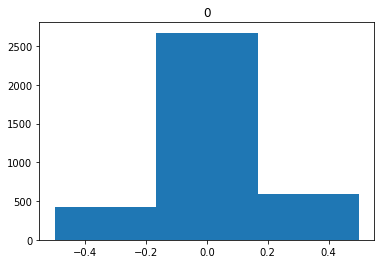

In [7]:
df = pd.DataFrame(steering_data)
df.hist(bins=3, grid=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000286796FE128>],
      dtype=object)

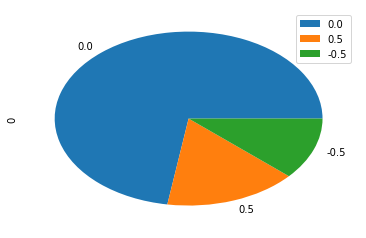

In [31]:
c = Counter(steering_data)
df = pd.DataFrame(data=list(c.values()), index=[str(i) for i in c.keys()])
df.plot(kind='pie', subplots=True)

In [17]:
"""
    Split data into training and testing portions
"""
assert len(images) == len(labels)

training_portion = 0.7

end_index = int(len(images)*training_portion)

labels_training = np.array(labels[:end_index])
images_training = np.array(images[:end_index])

labels_testing = np.array(labels[end_index:])
images_testing = np.array(images[end_index:])


In [18]:

with h5py.File('data.h5df') as f:
    f.clear()
    
    labels_training_dset = f.create_dataset('label_training', shape=labels_training.shape,
                                           dtype=labels_training.dtype)
    images_training_dset = f.create_dataset('images_training', shape=images_training.shape,
                                           dtype=images_training.dtype)
    
    labels_testing_dset = f.create_dataset('label_testing', shape=labels_testing.shape,
                                          dtype=labels_testing.dtype)
    images_testing_dset = f.create_dataset('images_testing', shape=images_testing.shape,
                                          dtype=images_testing.dtype)
    
    labels_training_dset[:] = labels_training
    images_training_dset[:] = images_training
    
    labels_testing_dset[:] = labels_testing
    images_testing_dset[:] = images_testing
    
    